# Step 1 | Importing Libraries

In [24]:
#importing dataset
import pandas as pd

#math
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#metrics
from sklearn import metrics

#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#dimention increasing
from sklearn.preprocessing import PolynomialFeatures

In [25]:
import warnings
warnings.filterwarnings("ignore")

# Step 2 | Reading Dataset

In [26]:
data = pd.read_csv("C:/Users/Deepak/Capstone_Project/insurance_data.csv")
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


## Our target is charges and we are trying to predict insurance cost.

# 

# Step 3 | Information

### Info

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Describing

In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [29]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Shape of dataset

In [30]:
df.shape

(1338, 7)

### Duplicated samples

In [31]:
df.duplicated().sum()

1

In [32]:
df_dup = df[df.duplicated()]
df_dup

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.6,0,no,northwest,1639.56


In [33]:
df.drop(index=[581], inplace=True)

### Missing values

In [34]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Some info :
1. There are 1338 samples with 7 columns(features).

2. As we can see, there are no missing values in our dataset.

3. But there is a duplicated sample, so we are going to delet it. (Now we have 1337 samples).

4. Also, we don't have missing values.


# 

# Step 4 | Preprocessing

### Outlier Detection

In [35]:
features = ['age', 'bmi', 'children', 'charges']

## Using Standard Deviation

In [36]:
index_list = []

for f in features :
    mean = df[f].mean()
    std = df[f].std()
    cutoff = std*3
    
    index = df[(df[f] < mean-cutoff) | (df[f] > mean+cutoff)].index
    index_list.extend(index)

In [37]:
index_list = sorted(set(index_list))
print("number of outliers (using Standard Deviation) is : ", len(index_list))
print("outlier indexes (using Standard Deviation) is : ", index_list)

number of outliers (using Standard Deviation) is :  29
outlier indexes (using Standard Deviation) is :  [32, 34, 71, 116, 166, 413, 425, 438, 543, 568, 577, 640, 819, 847, 877, 932, 937, 969, 984, 1047, 1085, 1116, 1130, 1146, 1230, 1245, 1272, 1300, 1317]


## Using Interquartile Range

In [38]:
index_list = []

for f in features :
    Q1 = np.percentile(df[f], 25)
    Q3 = np.percentile(df[f], 75)
    
    IQR = Q3 - Q1
    
    index = df[(df[f] < Q1-1.5*IQR) | (df[f] > Q3+1.5*IQR)].index
    index_list.extend(index)

In [39]:
index_list = sorted(set(index_list))
print("number of outliers (using Interquartile Range) is : ", len(index_list))
print("outlier indexes (using Interquartile Range) is : ", index_list)

number of outliers (using Interquartile Range) is :  145
outlier indexes (using Interquartile Range) is :  [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 116, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 286, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 401, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 847, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1088, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1317, 1323]


## Using scatter and boxplot

In [40]:
numerical_features = ['age', 'bmi', 'charges']

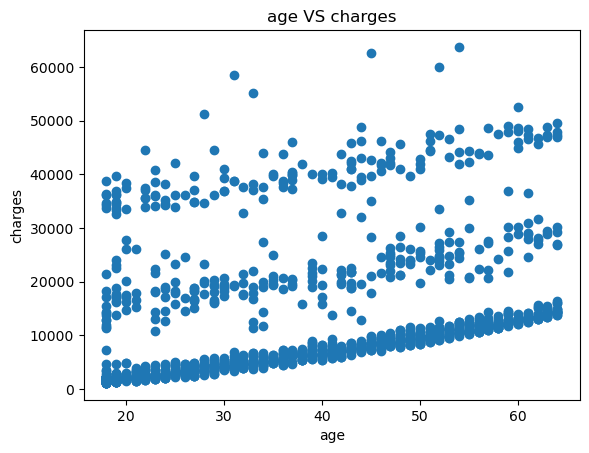

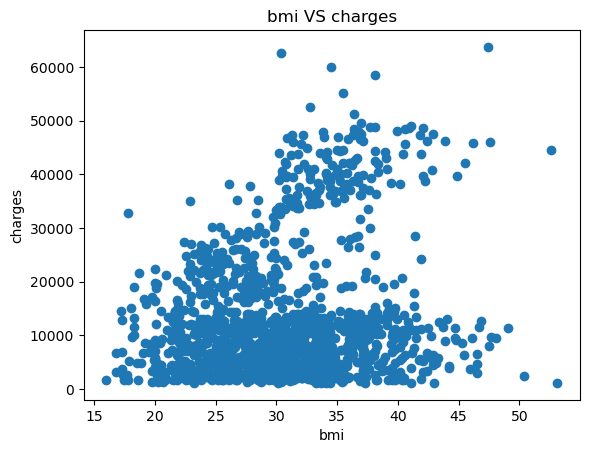

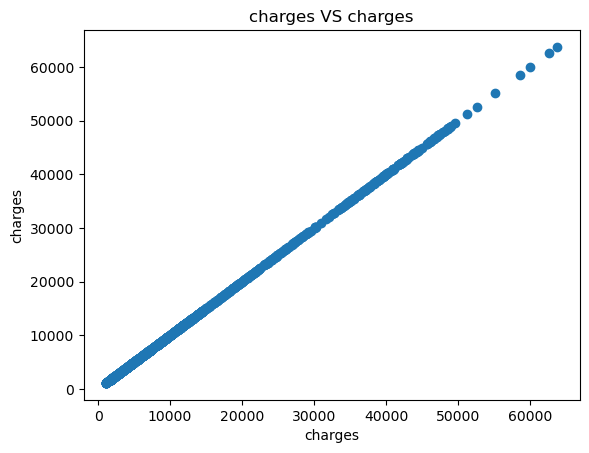

In [41]:
# numericals
for n in numerical_features :
    plt.scatter(df[n], df["charges"])
    plt.title(f"{n} VS charges")
    plt.xlabel(f"{n}")
    plt.ylabel("charges")
    plt.show()

In [42]:
categorical_features = ["sex", "children", "smoker", "region"]

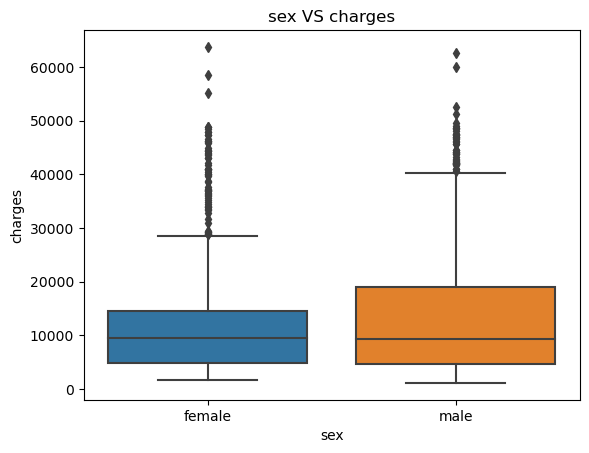

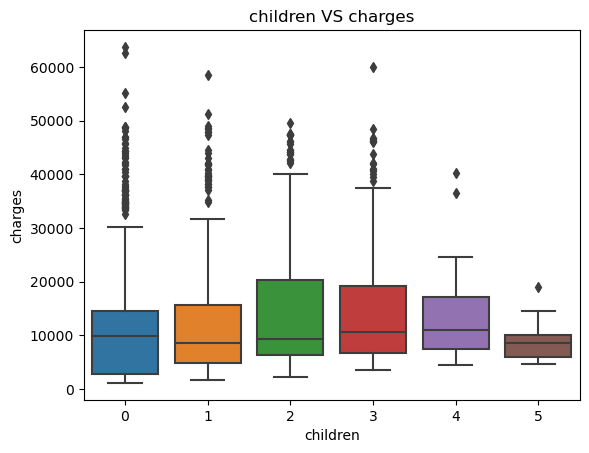

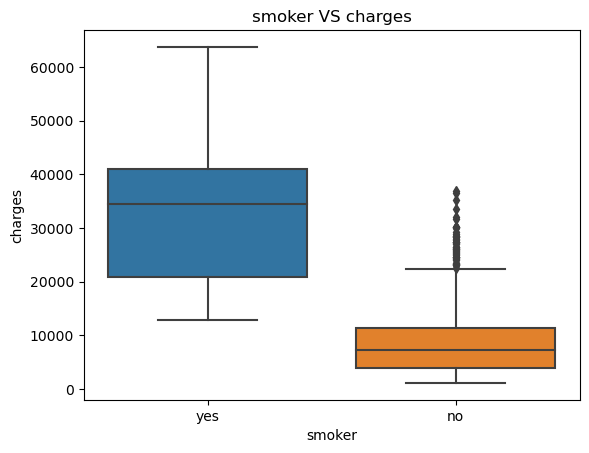

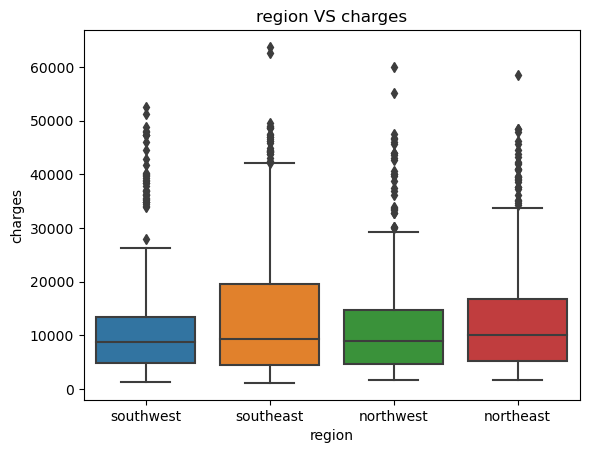

In [49]:
#categoricals
for n in categorical_features:
    sns.boxplot(x=df[n], y=df["charges"])
    plt.title(f"{n} VS charges")
    plt.show()

## There are some outliers in our dataset. But it doesn't mean that they are false values or I should remove them. Also the number of samples are low.


#### Note : removing outliers didnot increase the accuaracy of our model .

# 

# Step 5 | Visualizations

### First let's have a quik overview using pairplot.

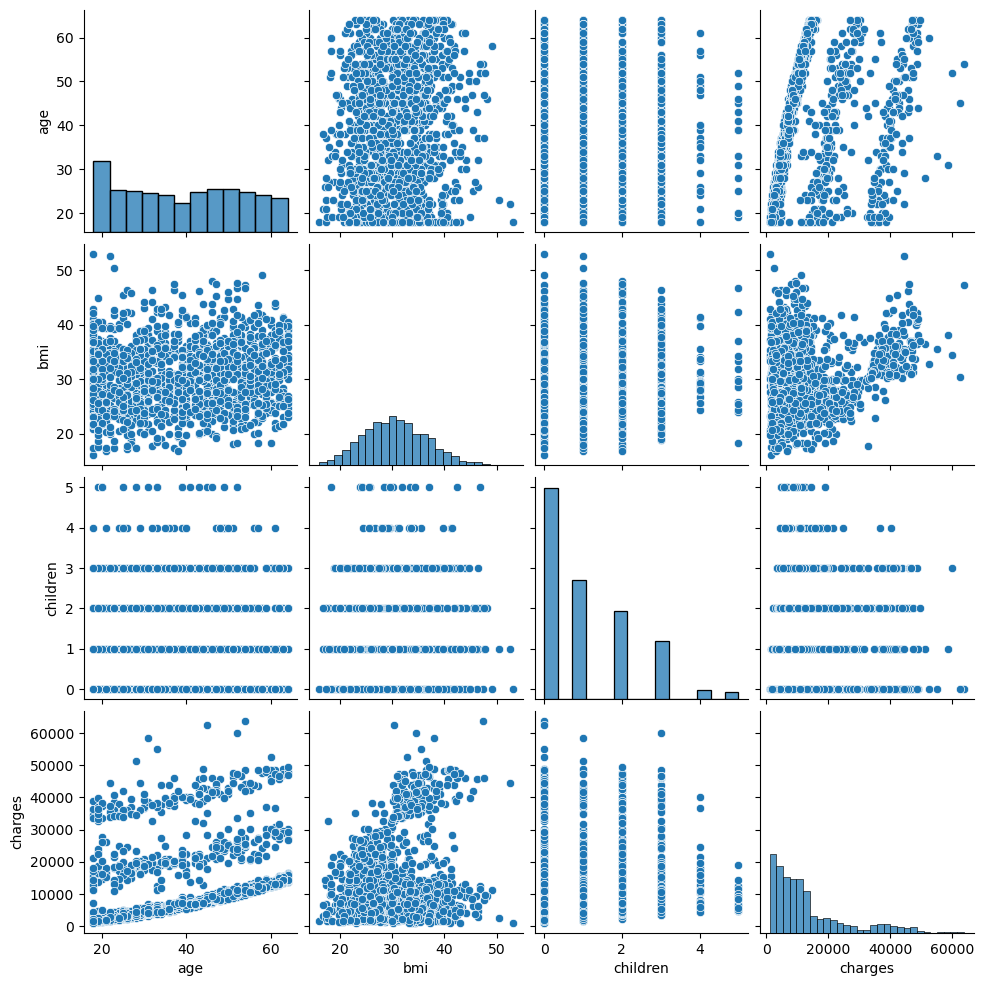

In [50]:
sns.pairplot(df)

## Numerical features

## checking features distribution 

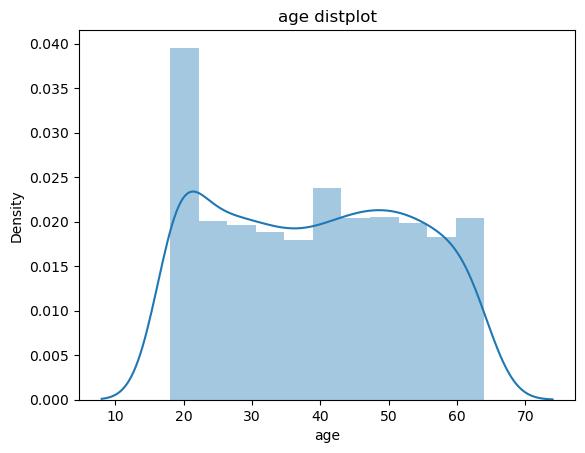

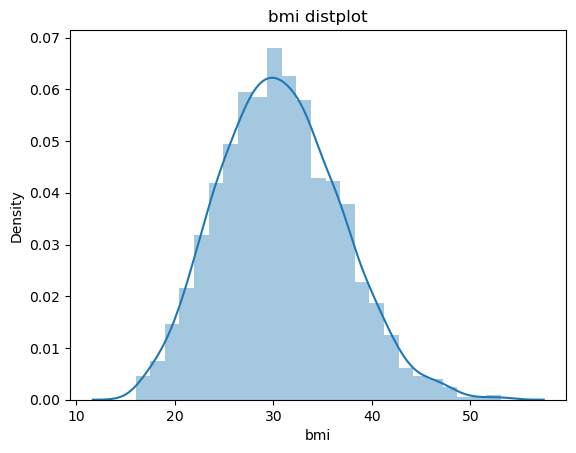

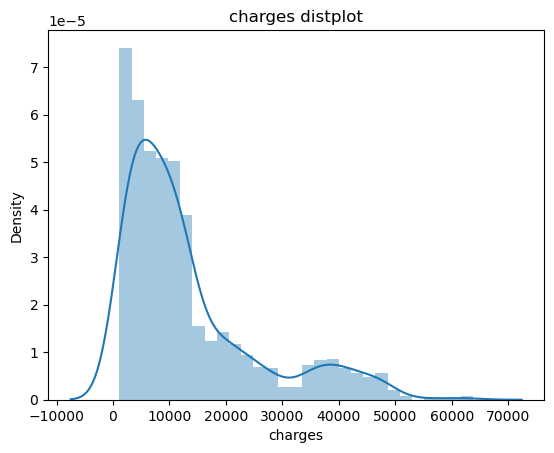

In [51]:
for nf in numerical_features :
    sns.distplot(df[nf])
    plt.title(f"{nf} distplot")
    plt.show()

## Notes :
    1. Column 'age' has different range of ages and most of them are around 20.
    2. Column 'charges' is right skewed. 

# 

## Categorical Features

In [52]:
categorical_features = ['sex','children', 'smoker', 'region']

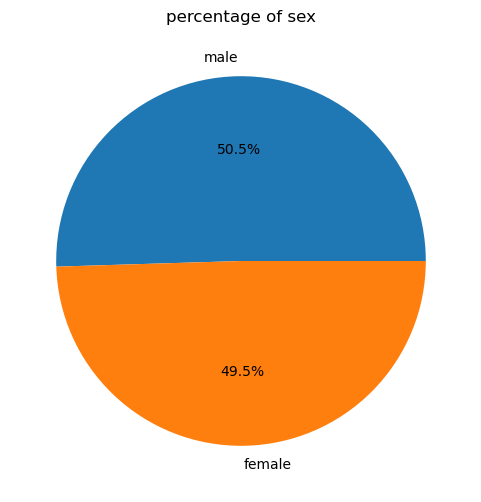

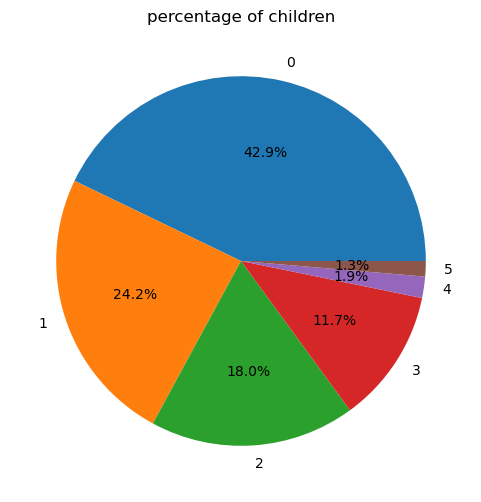

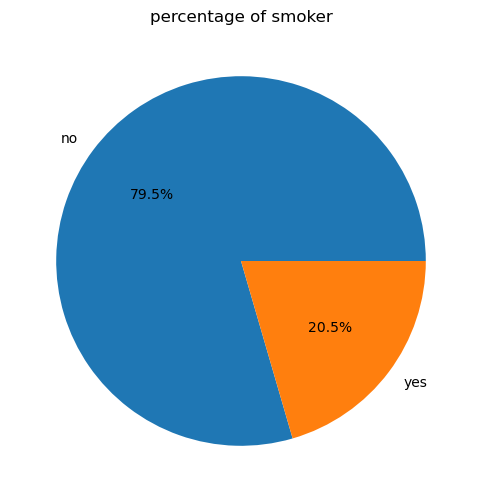

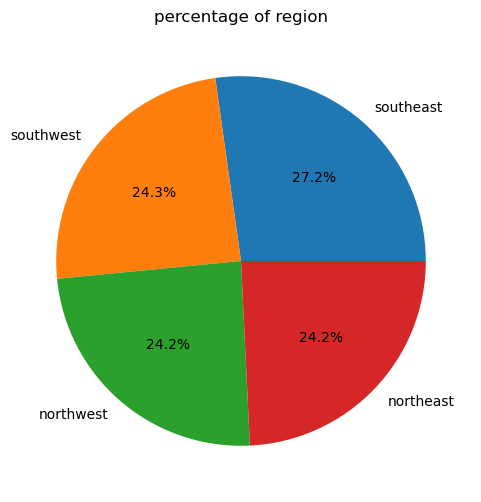

In [53]:
for c in categorical_features :
    s = df[c].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {c}')
    plt.show()

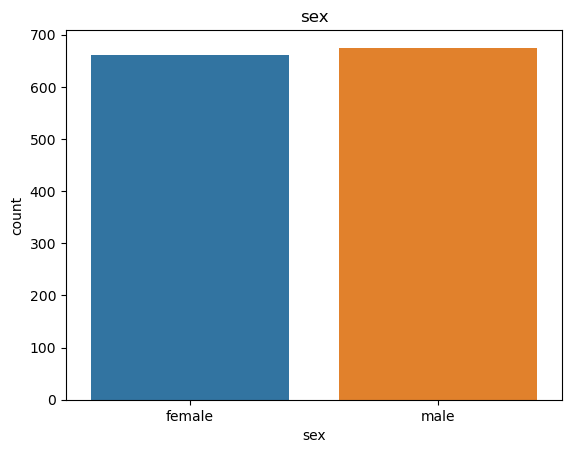

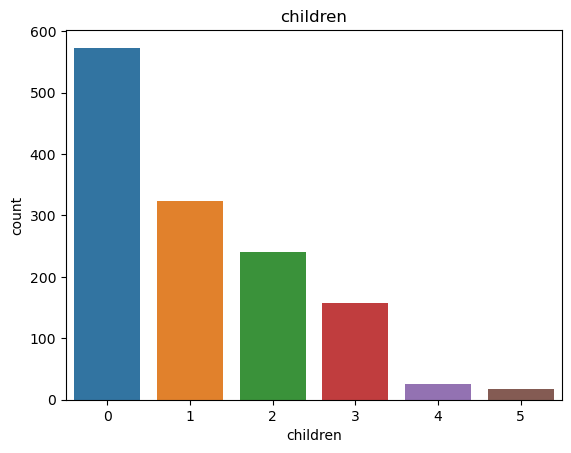

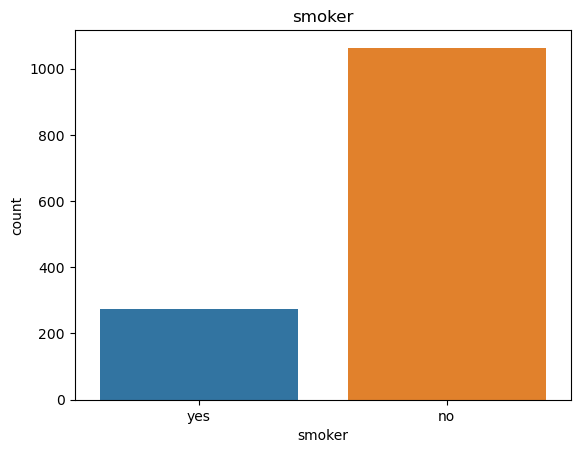

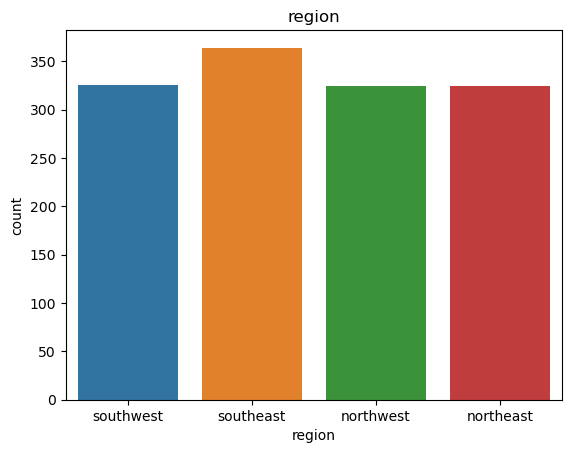

In [54]:
for c in categorical_features :
    sns.countplot(data=df, x = df[c])
    plt.title(f"{c}")
    plt.show()

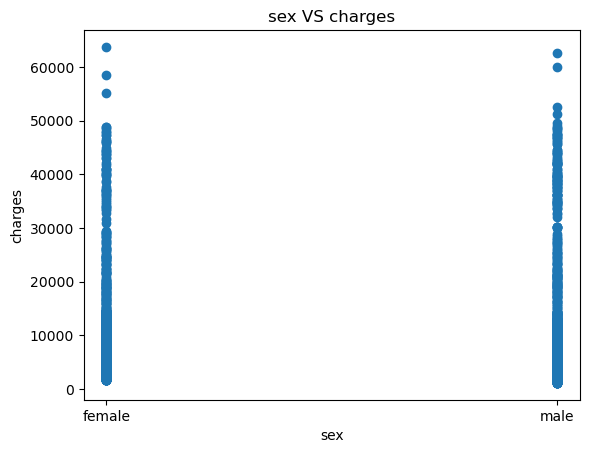

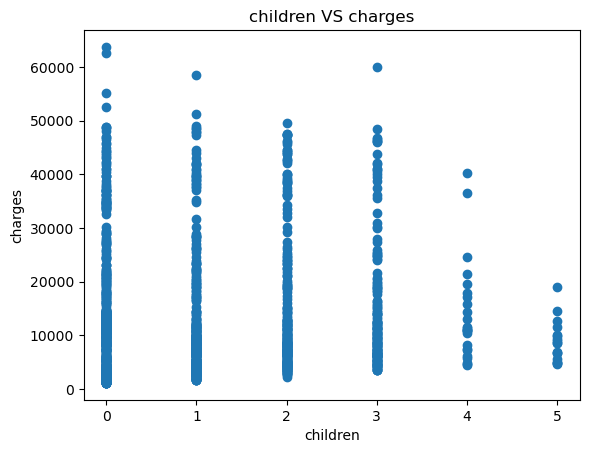

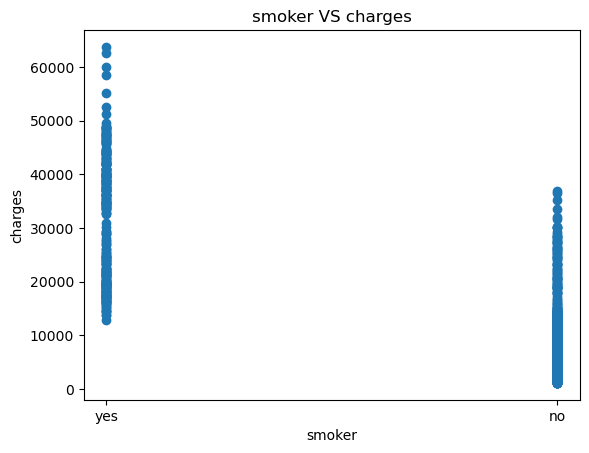

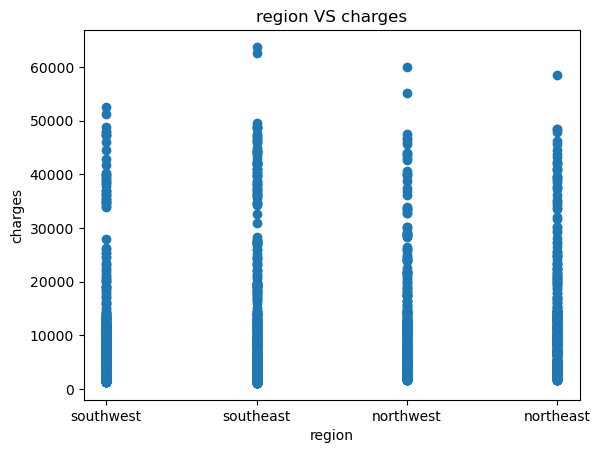

In [55]:
for c in categorical_features :
    plt.scatter(df[c], df["charges"])
    plt.title(f"{c} VS charges")
    plt.xlabel(f"{c}")
    plt.ylabel("charges")
    plt.show()

## Notes :
    1. In column 'sex', the number of male clients are more than female clients. (0.5% more)
    2. In column 'children', most people do not have child and only 1.3% of all have 5 children. The charges which families 
       with  5 children got is less than 30000.
    3. In column 'smoker', most clients are not smokers and only 20.5%(less than 300) of all are.
    4. In column 'region', northwest and northeast has the same percentage and southeast has the highest(27.2%).

# 

# Step 6 |  Categorical Features Encoding

### We should covert Categorical Features to numbers, because ML Models cannot work with categorical features.
    1. Label Encoding : converting categorical features into numerical features.
    2. One hot encoding : convert each categorical value into new categorical column and assign a binary value of 0 to 1 to them
    3. Dummy variable trap : occurs when 2 or more dummy variables created by one hit encoding are highly correlated(multicolinear).

In [56]:
categoricals = ['sex', 'smoker', 'region']

In [57]:
df1 = pd.get_dummies(df, columns=categoricals, drop_first=True)
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [58]:
df1.duplicated().sum()

0

# Step 7 | Correlation

<Axes: >

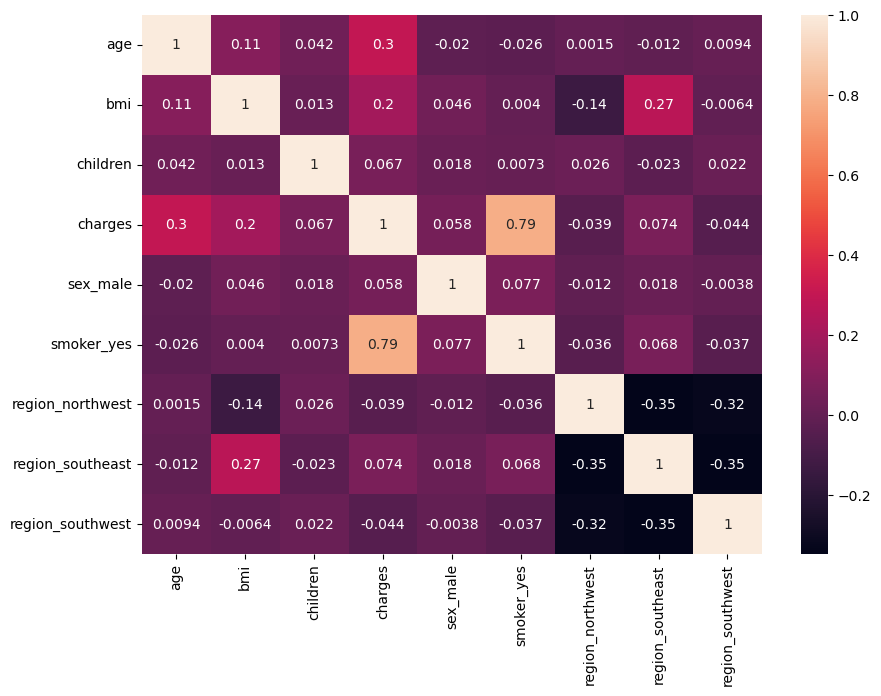

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)

### Notes :
    1. regions are  correlated with each other, so we have Multicollinearity.
    2. charges is highly correlated with smoker_yes.

# step 8 | LinearRegression

### Selecting X and Y

In [60]:
x = pd.DataFrame(df1, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])

y = df1["charges"]

### train test split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

### Scaling 

In [62]:
scaler = StandardScaler()
scaler.fit(x_train)  
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

### LinearRegression Model

In [63]:
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

### intercept and coef

In [64]:
linear_intercept = reg.intercept_
linear_coef = reg.coef_

In [65]:
for f,c in zip(x_train, linear_coef):
    print("coef of column ", f, " is : ", c)

coef of column  age  is :  3408.2052785448705
coef of column  bmi  is :  1808.7387265230086
coef of column  children  is :  575.8375528452121
coef of column  sex_male  is :  -41.32705036827925
coef of column  smoker_yes  is :  9465.76282946424
coef of column  region_northwest  is :  -241.85465187136882
coef of column  region_southeast  is :  -360.42271328041386
coef of column  region_southwest  is :  -548.0914689213096


### predicting

In [66]:
y_pred = reg.predict(scaled_x_test)

In [67]:
linear_score = metrics.r2_score(y_test, y_pred)

### metrics

In [68]:
def Evaluation(x_test, y_test, model) :
    y_pred = model.predict(x_test)    
    mse = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)

In [69]:
Evaluation(scaled_x_test, y_test, reg)

mean_absolute_error :  4241.108895269092
mean_squared_error  :  38830471.956461355
root_mean_absolute_error 6231.410109795484
R2_score            :  0.7628811801298234


In [70]:
def compare(y_test, y_pred):
    compare = pd.DataFrame()
    compare["Actual"] = y_test
    compare["Predict"] = y_pred
    compare["compare"] = abs(y_test-y_pred)
    return compare

In [71]:
compare(y_test,y_pred)

,Actual,Predict,compare
1248,1633.96,5161.606622,3527.646622
610,8547.69,9608.229283,1060.539283
393,9290.14,11415.083429,2124.943429
503,32548.34,26131.195005,6417.144995
198,9644.25,7013.427856,2630.822144
...,...,...,...
1320,5425.02,7330.332500,1905.312500
97,10226.28,13627.873354,3401.593354
786,12741.17,15271.093598,2529.923598
1181,2850.68,3939.274689,1088.594689


Text(0, 0.5, 'y_pred')

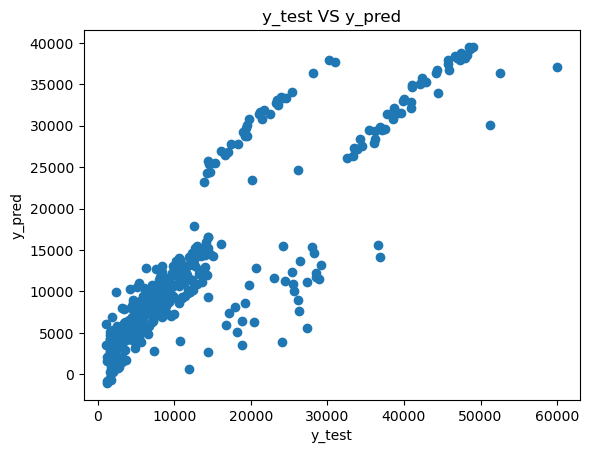

In [72]:
plt.scatter(y_test, y_pred)
plt.title("y_test VS y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

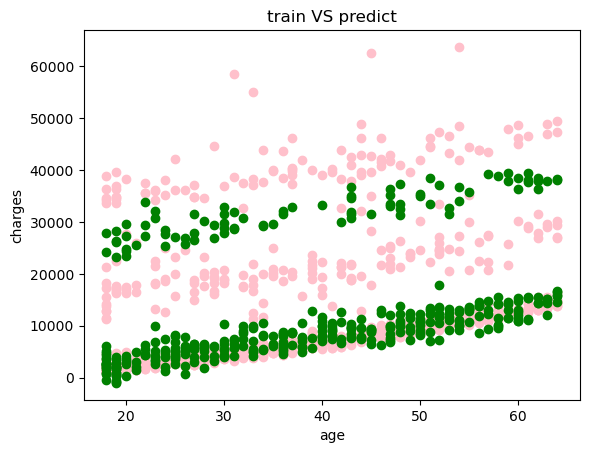

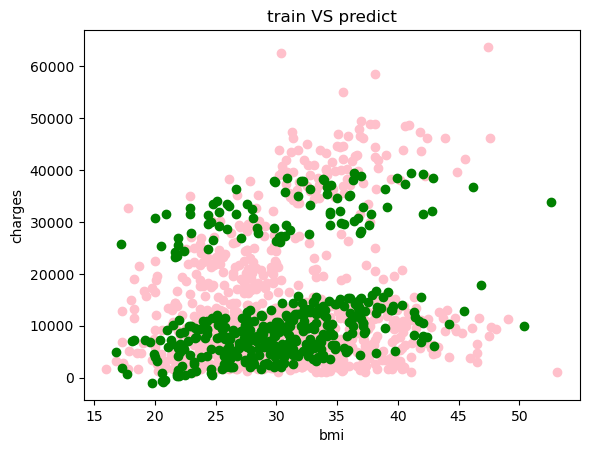

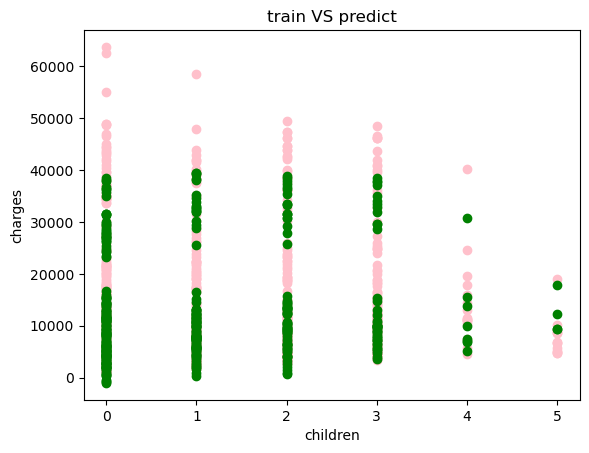

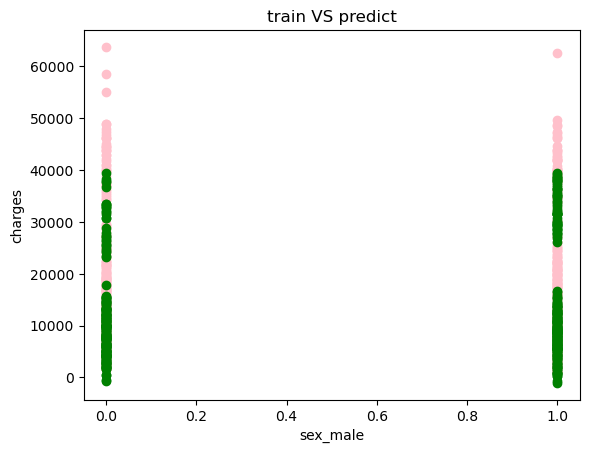

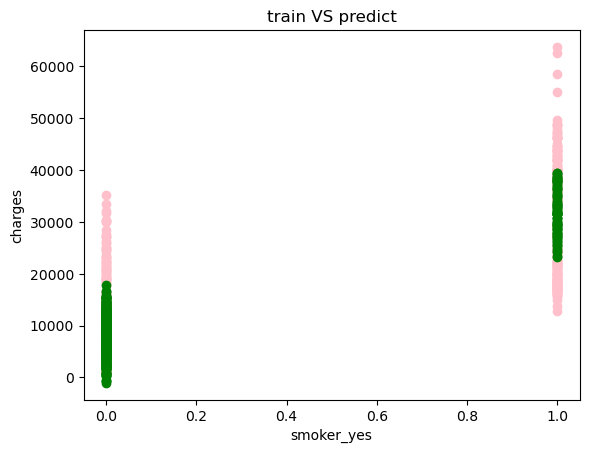

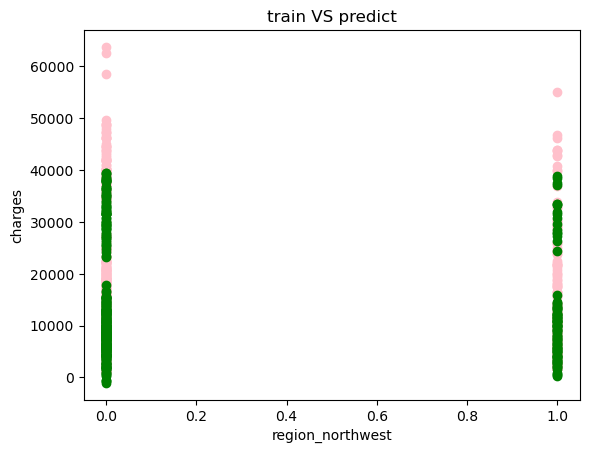

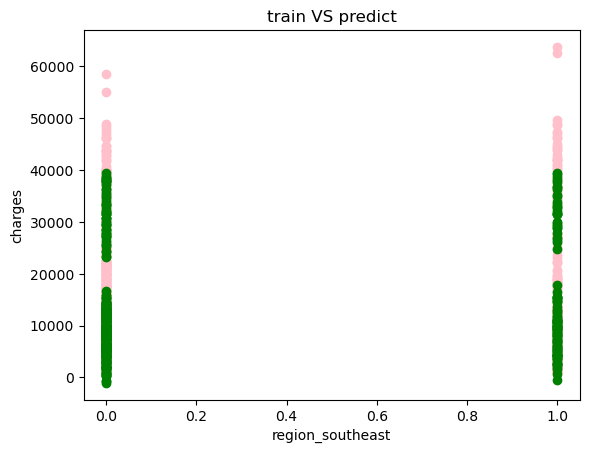

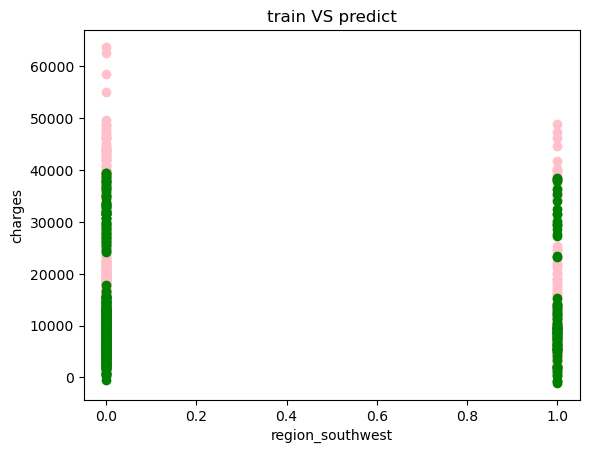

In [73]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="pink")
    plt.scatter(x_test[i], y_pred, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

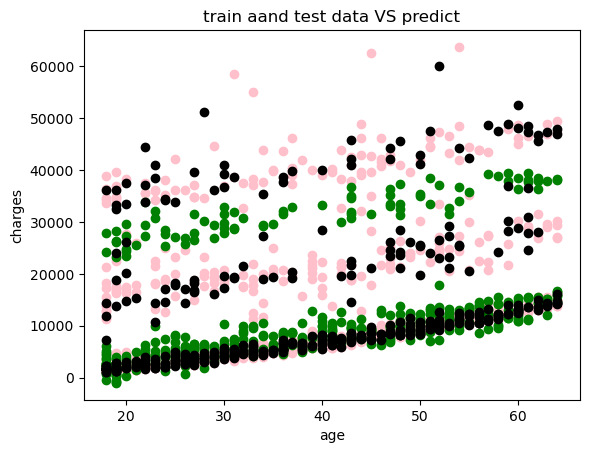

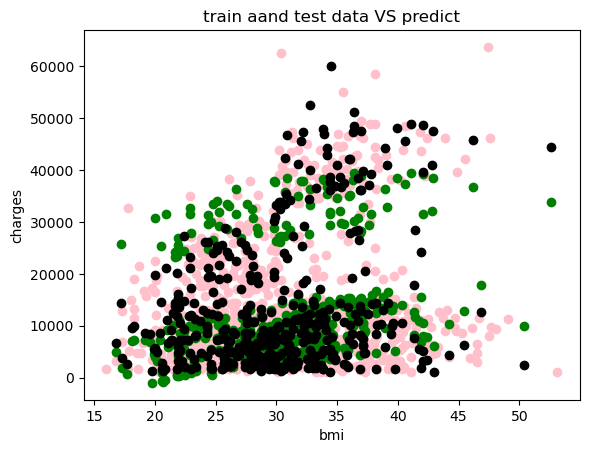

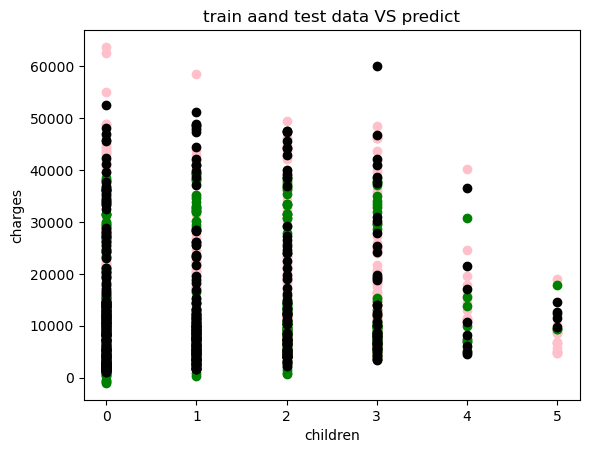

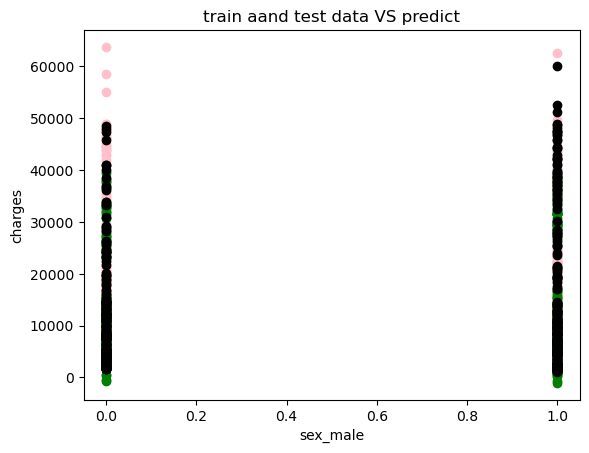

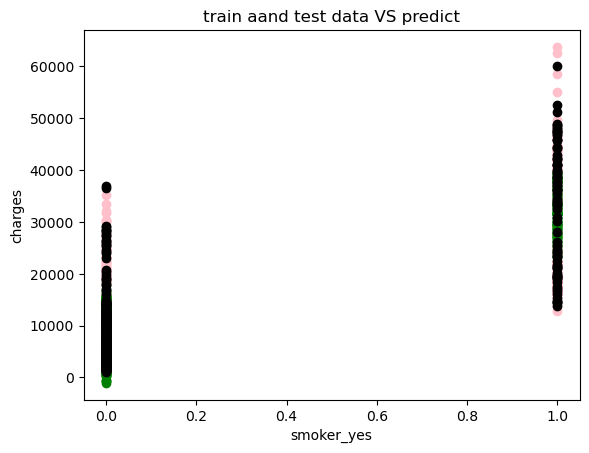

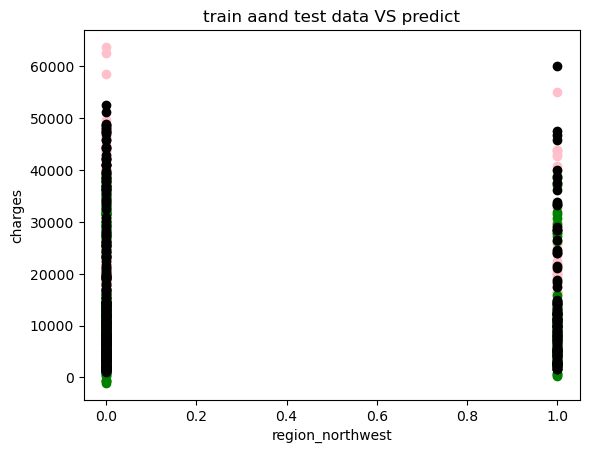

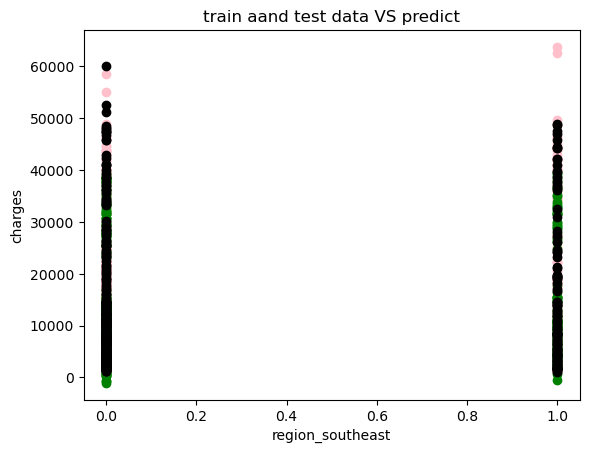

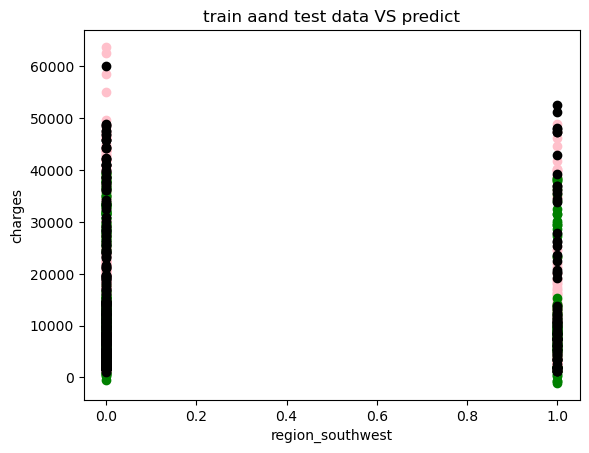

In [74]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="pink")
    plt.scatter(x_test[i], y_pred, color="green")
    plt.scatter(x_test[i], y_test, color="black")
    plt.title("train aand test data VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

### Cross validation

In [75]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(reg, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.74686975 0.76340494 0.71405001]
mean of all scores is :  0.7414415629574728


In [76]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(reg, scaled_x_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.74384172 0.71550418 0.75267455]
mean of all scores is :  0.7373401483673406


# Step 9 | Polynomial Regression

In [77]:
x = pd.DataFrame(df1, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])
x.reset_index(drop=True, inplace=True)

In [78]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)        # array
x_poly = pd.DataFrame(x_poly, columns=poly_features.get_feature_names_out(x.columns))   # dataFrame
x_poly

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age^2,age bmi,...,smoker_yes^2,smoker_yes region_northwest,smoker_yes region_southeast,smoker_yes region_southwest,region_northwest^2,region_northwest region_southeast,region_northwest region_southwest,region_southeast^2,region_southeast region_southwest,region_southwest^2
0,19.0,27.9,0.0,0.0,1.0,0.0,0.0,1.0,361.0,530.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18.0,33.8,1.0,1.0,0.0,0.0,1.0,0.0,324.0,608.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,33.0,3.0,1.0,0.0,0.0,1.0,0.0,784.0,924.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33.0,22.7,0.0,1.0,0.0,1.0,0.0,0.0,1089.0,749.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,32.0,28.9,0.0,1.0,0.0,1.0,0.0,0.0,1024.0,924.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50.0,31.0,3.0,1.0,0.0,1.0,0.0,0.0,2500.0,1550.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1333,18.0,31.9,0.0,0.0,0.0,0.0,0.0,0.0,324.0,574.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,18.0,36.9,0.0,0.0,0.0,0.0,1.0,0.0,324.0,664.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,21.0,25.8,0.0,0.0,0.0,0.0,0.0,1.0,441.0,541.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Now there are 44 columns.

In [79]:
x_poly.duplicated().sum()

2

In [80]:
x.duplicated().sum()

2

In df1, there are no duplicated samples but because x and x_poly doen't have column "y", they both have 2 similar duplicated samples.

# 

### train and test split

In [81]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y, test_size=0.3, random_state=0)

### Scaling

In [82]:
scaler = StandardScaler()
scaler.fit(x_poly_train)  # fit on training data

StandardScaler()

In [83]:
x_poly_scaled_train = scaler.transform(x_poly_train)  # array
x_poly_scaled_train = pd.DataFrame(x_poly_train, columns=poly_features.get_feature_names_out(x.columns)) # DataFrame

x_poly_scaled_test = scaler.transform(x_poly_test)   # array
x_poly_scaled_test = pd.DataFrame(x_poly_test, columns=poly_features.get_feature_names_out(x.columns))   # DataFrame

### Poly LinearRegression

In [84]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly_scaled_train, y_poly_train)

LinearRegression()

### predict

In [85]:
y_poly_pred = poly_reg.predict(x_poly_scaled_test)

### metrics

In [86]:
#Evaliuation on test dataset

Evaluation(x_poly_test, y_poly_test, poly_reg)

mean_absolute_error :  2978.563143187753
mean_squared_error  :  24509805.977088872
root_mean_absolute_error 4950.7379224807355
R2_score            :  0.8503305271424277


In [87]:
#Evaluation on train dataset

Evaluation(x_poly_train, y_poly_train, poly_reg)

mean_absolute_error :  2729.8567782633563
mean_squared_error  :  21742639.24568061
root_mean_absolute_error 4662.900304068339
R2_score            :  0.8435744030911304


In [88]:
poly_score = metrics.r2_score(y_poly_test, y_poly_pred)
poly_score

0.8503305271424277

In [89]:
linear_score

0.7628811801298234

#### Score of LinearRegression is 76.2% and the score of PolyLinearRegression is 85%. So far, PolyLinearRegression has the higher score.

# 

### Finding useful features 

In [90]:
# Here I am trying to creat x with useful columns

def useful_poly_columns(given_score):
    score = given_score
    
    for col in x_poly.columns:
    
        name_of_column = str(col)                            # creating name for the new column in x
        
        if col not in x:
            x.insert(0, name_of_column, x_poly[col])         # adding the new column into x 
            
            x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.3)  # creating new params with new datas in dataFrame x
            
            reg_model = LinearRegression()                   # creating a new model
            reg_model.fit(x_train, y_train)                  # fittng the model on new data
            
            y_pred = reg_model.predict(x_test)
            new_score = metrics.r2_score(y_test, y_pred)
    
            if new_score < score :
                x.drop(col,axis=1, inplace=True)
            else :
                score = new_score
        
    print(score)
        
    return x

In [91]:
useful_poly_columns(linear_score)

0.8503694195100279


,region_southeast region_southwest,region_northwest region_southwest,region_northwest region_southeast,region_northwest^2,smoker_yes region_southwest,smoker_yes region_southeast,smoker_yes^2,children region_southwest,children region_northwest,children smoker_yes,...,age bmi,age^2,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,530.1,361.0,19,27.9,0,0,1,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,608.4,324.0,18,33.8,1,1,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,924.0,784.0,28,33.0,3,1,0,0,1,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,749.1,1089.0,33,22.7,0,1,0,1,0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,924.8,1024.0,32,28.9,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1550.0,2500.0,50,31.0,3,1,0,1,0,0
1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,574.2,324.0,18,31.9,0,0,0,0,0,0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,664.2,324.0,18,36.9,0,0,0,0,1,0
1335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,541.8,441.0,21,25.8,0,0,0,0,0,1


#### x_poly has 44 columns. Using useful_poly_columns function, the nimber of columns decreased to 25. Now there are less columns and the accuracy of the model increased a little too.

### Building new model using new x

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.3) 

In [93]:
poly_regression2 = LinearRegression()
poly_regression2.fit(x_train, y_train)

LinearRegression()

In [94]:
Evaluation(x_train, y_train, poly_regression2)

mean_absolute_error :  2732.501995861537
mean_squared_error  :  22024207.0135528
root_mean_absolute_error 4692.995526692179
R2_score            :  0.8415486873690404


In [95]:
Evaluation(x_test, y_test, poly_regression2)

mean_absolute_error :  2954.002640227055
mean_squared_error  :  24503436.98035448
root_mean_absolute_error 4950.094643575462
R2_score            :  0.8503694195100279


#### New polyRegressin Model has 84.11% accuracy on traing data and 85.03% on test data.

# 

### CrossValidation

In [96]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(poly_regression2, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.7838666  0.81043386 0.84008629 0.84206497 0.83143875 0.8543482
 0.8339068  0.90562775 0.87830142 0.80127096]
mean of all scores is :  0.8381345575070343


In [97]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(poly_regression2, x_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.76793395 0.84113666 0.80689413 0.88272203 0.80963801 0.8014497
 0.85401641 0.89605833 0.82262657 0.85364776]
mean of all scores is :  0.8336123555663288


### Prediction

In [98]:
y_pred_poly_regression = poly_regression2.predict(x_test)

In [99]:
poly_score = metrics.r2_score(y_test, y_pred_poly_regression)
poly_score

0.8503694195100279

### Comparing

In [100]:
compare(y_test, y_pred_poly_regression)

,Actual,Predict,compare
1248,1633.96,1936.062505,302.102505
610,8547.69,10253.503043,1705.813043
393,9290.14,11092.153334,1802.013334
503,32548.34,25618.728261,6929.611739
198,9644.25,9931.549065,287.299065
...,...,...,...
1320,5425.02,8128.130599,2703.110599
97,10226.28,11222.442332,996.162332
786,12741.17,14369.059290,1627.889290
1181,2850.68,3848.545029,997.865029


Text(0.5, 0, 'y_test')

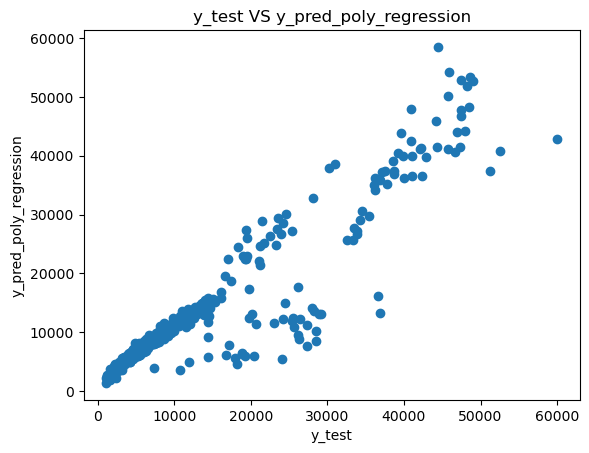

In [101]:
plt.scatter(y_test, y_pred_poly_regression)
plt.title("y_test VS y_pred_poly_regression")
plt.ylabel("y_pred_poly_regression")
plt.xlabel("y_test")

# 

# Step 10 | Ridge Regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization.

Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

### train test split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

### scaling

In [103]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Ridge Resression Model

In [104]:
alpha = 10**np.linspace(10,-2,100)*0.5       # alpha is non-negative  : [0, int]

In [105]:
ridge_cv = RidgeCV(alphas=alpha, scoring="neg_mean_squared_error", cv=10)
ridge_cv.fit(x_train_scaled, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [106]:
print( "alpha value : ", ridge_cv.alpha_)     

alpha value :  0.7599555414764666


In [107]:
ridge_coef = ridge_cv.coef_
ridge_coef

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -9.45424625e+01,
        8.87989508e+01,  1.17029903e+01, -4.37569033e+03, -2.41013826e+02,
        2.75860032e+02, -5.99428354e+01, -1.99129043e+03, -2.50991764e+02,
        1.84005778e+04,  4.15254868e+02, -1.08861762e+01,  2.39849912e+02,
       -3.08432502e+02,  1.85756812e+01,  2.92460228e+03,  5.68351203e+02,
        2.95323419e+02,  1.06892872e+03, -1.17330837e+02, -4.37569033e+03,
       -9.45424625e+01,  1.02966847e+03, -5.54998637e+02])

### Evaluation

In [108]:
Evaluation(x_train_scaled, y_train, ridge_cv)

mean_absolute_error :  2734.7329875925975
mean_squared_error  :  22034958.36890142
root_mean_absolute_error 4694.140855247254
R2_score            :  0.8414713376435088


In [109]:
Evaluation(x_test_scaled, y_test, ridge_cv)

mean_absolute_error :  2948.6239012733245
mean_squared_error  :  24461626.271479115
root_mean_absolute_error 4945.869617314948
R2_score            :  0.8506247371883084


#### The accuracy of polynomial regression and Ridge resgression are almost the same.

### Predict

In [110]:
y_pred_ridge = ridge_cv.predict(x_test_scaled)

In [111]:
ridge_score = metrics.r2_score(y_test, y_pred_ridge)
ridge_score

0.8506247371883084

### Comparing

In [112]:
compare(y_test, y_pred_ridge)

,Actual,Predict,compare
1248,1633.96,2007.292470,373.332470
610,8547.69,10194.533135,1646.843135
393,9290.14,11112.437044,1822.297044
503,32548.34,25732.948597,6815.391403
198,9644.25,9869.048363,224.798363
...,...,...,...
1320,5425.02,8117.096938,2692.076938
97,10226.28,11280.031137,1053.751137
786,12741.17,14386.300846,1645.130846
1181,2850.68,3853.248107,1002.568107


Text(0.5, 0, 'y_test')

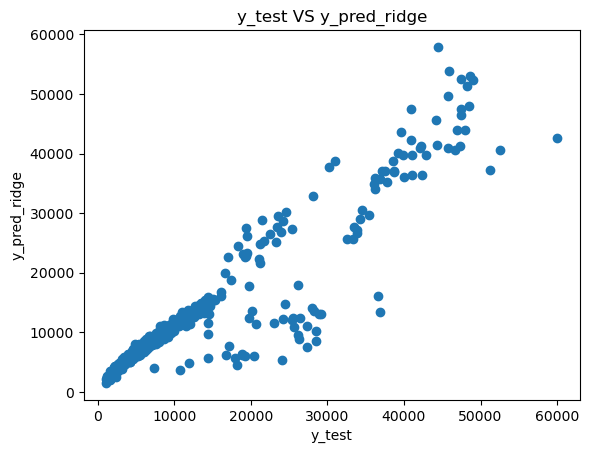

In [113]:
plt.scatter(y_test, y_pred_ridge)
plt.title("y_test VS y_pred_ridge")
plt.ylabel("y_pred_ridge")
plt.xlabel("y_test")

# 

# Step 11 | LassoRegression

Lasso Regression can exclude useless variables from equation, and that is the difference between lasso and ridge regression.

Linear Model trained with L1 prior as regularizer

### train test split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

### Scaling

In [115]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Lasso Model

In [116]:
lasso_cv = LassoCV(n_alphas=100, max_iter=1000, cv=10)
lasso_cv.fit(x_train_scaled, y_train)

LassoCV(cv=10)

In [117]:
lasso_cv.alpha_

20.02266453802765

### coef

In [118]:
ridge_coef = ridge_cv.coef_
ridge_coef

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -9.45424625e+01,
        8.87989508e+01,  1.17029903e+01, -4.37569033e+03, -2.41013826e+02,
        2.75860032e+02, -5.99428354e+01, -1.99129043e+03, -2.50991764e+02,
        1.84005778e+04,  4.15254868e+02, -1.08861762e+01,  2.39849912e+02,
       -3.08432502e+02,  1.85756812e+01,  2.92460228e+03,  5.68351203e+02,
        2.95323419e+02,  1.06892872e+03, -1.17330837e+02, -4.37569033e+03,
       -9.45424625e+01,  1.02966847e+03, -5.54998637e+02])

### Evaluation

In [119]:
Evaluation(x_test_scaled, y_test, lasso_cv)

mean_absolute_error :  2945.175135430436
mean_squared_error  :  24498863.213013887
root_mean_absolute_error 4949.632634147093
R2_score            :  0.8503973492842365


In [120]:
Evaluation(x_train_scaled, y_train, lasso_cv)

mean_absolute_error :  2746.0385508145773
mean_squared_error  :  22136136.404138677
root_mean_absolute_error 4704.905568036268
R2_score            :  0.8407434207435769


### Predict

In [121]:
y_pred_lasso = lasso_cv.predict(x_test_scaled)

In [122]:
lasso_score = metrics.r2_score(y_test, y_pred_lasso)
lasso_score

0.8503973492842365

### Compare

In [123]:
compare(y_test, y_pred_lasso)

,Actual,Predict,compare
1248,1633.96,2378.791588,744.831588
610,8547.69,9919.544782,1371.854782
393,9290.14,11021.438099,1731.298099
503,32548.34,26044.633864,6503.706136
198,9644.25,9936.795514,292.545514
...,...,...,...
1320,5425.02,7789.315821,2364.295821
97,10226.28,11502.808361,1276.528361
786,12741.17,14157.176049,1416.006049
1181,2850.68,3968.509565,1117.829565


Text(0.5, 0, 'y_test')

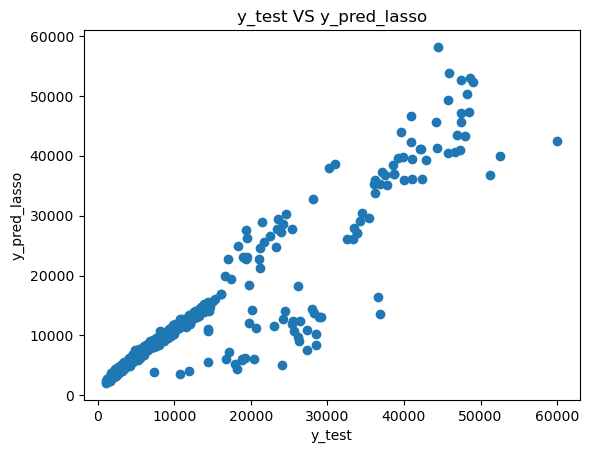

In [124]:
plt.scatter(y_test, y_pred_lasso)
plt.title("y_test VS y_pred_lasso")
plt.ylabel("y_pred_lasso")
plt.xlabel("y_test")

# 

# Step 12 | ElasticNet

Linear regression with combined L1 and L2 priors as regularizer.

The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

### train test split

In [125]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x, y, test_size=0.3, random_state=0)

### scaling

In [126]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### ElasticNet Model

In [127]:
elasticnet_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.01, n_alphas=100, max_iter=1000)
elasticnet_cv.fit(x_train_scaled, y_train)

ElasticNetCV(eps=0.01, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

Elastic net model with best model selection by cross-validation.

### coef and alpha and l1_ratio_

In [128]:
elastic_coef = elasticnet_cv.coef_
elastic_coef

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  5.54649402e+01, -2.88116740e+01, -1.37535019e+02,
        2.19403855e+01, -0.00000000e+00, -1.50464184e+02, -0.00000000e+00,
        1.36673377e+04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.10344045e+01,  8.47981944e+02,  2.70410578e+03,  5.57747262e+01,
        0.00000000e+00,  6.79872837e+02, -1.11345273e+01, -3.78707666e+03,
       -0.00000000e+00, -0.00000000e+00, -2.37846443e+02])

In [129]:
elasticnet_cv.alpha_

99.65327322648055

In [130]:
elasticnet_cv.l1_ratio_

1.0

### Evaluation

In [131]:
Evaluation(x_test_scaled, y_test, elasticnet_cv)

mean_absolute_error :  3024.942090661235
mean_squared_error  :  25483454.790144145
root_mean_absolute_error 5048.113983473842
R2_score            :  0.8443849270534427


In [132]:
Evaluation(x_train_scaled, y_train, elasticnet_cv)

mean_absolute_error :  2858.9291518761315
mean_squared_error  :  23315675.720120363
root_mean_absolute_error 4828.630832867673
R2_score            :  0.8322573239319135


### Predict

In [133]:
y_pred_elastic = elasticnet_cv.predict(x_test_scaled)

In [134]:
elastic_score = metrics.r2_score(y_test, y_pred_elastic)
elastic_score

0.8443849270534427

### Compare

In [135]:
compare(y_test, y_pred_elastic)

,Actual,Predict,compare
1248,1633.96,3215.740003,1581.780003
610,8547.69,9610.427806,1062.737806
393,9290.14,10601.296637,1311.156637
503,32548.34,26939.563637,5608.776363
198,9644.25,9549.050040,95.199960
...,...,...,...
1320,5425.02,7350.567279,1925.547279
97,10226.28,12098.263317,1871.983317
786,12741.17,14061.633604,1320.463604
1181,2850.68,4239.533418,1388.853418


Text(0.5, 0, 'y_test')

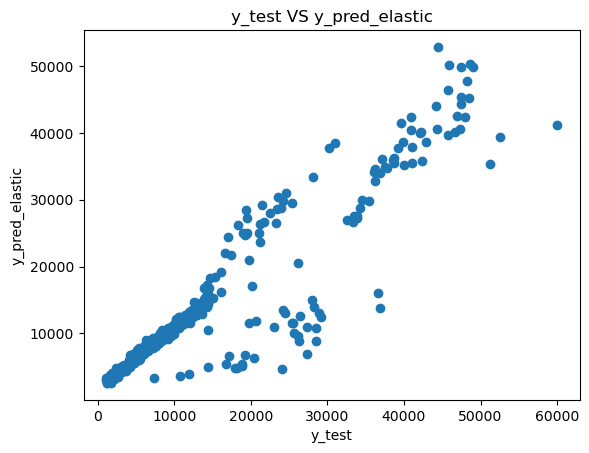

In [136]:
plt.scatter(y_test, y_pred_elastic)
plt.title("y_test VS y_pred_elastic")
plt.ylabel("y_pred_elastic")
plt.xlabel("y_test")

# 

# Step 13 | DecisionTreeRegressor

A Decision Tree algorithm is one of the most popular machine learning algorithms. It is a supervised learning algorithm which can be used for both Calssification and Regression datasets. Decision tree includes 3 parts such as a root node, branches, and leaf nodes. Also there could be internal node which are attributes.

## 13.1 | First let's build a model using the x DataFrame with 25 columns(outliers are included)

In [137]:
x

,region_southeast region_southwest,region_northwest region_southwest,region_northwest region_southeast,region_northwest^2,smoker_yes region_southwest,smoker_yes region_southeast,smoker_yes^2,children region_southwest,children region_northwest,children smoker_yes,...,age bmi,age^2,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,530.1,361.0,19,27.9,0,0,1,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,608.4,324.0,18,33.8,1,1,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,924.0,784.0,28,33.0,3,1,0,0,1,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,749.1,1089.0,33,22.7,0,1,0,1,0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,924.8,1024.0,32,28.9,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1550.0,2500.0,50,31.0,3,1,0,1,0,0
1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,574.2,324.0,18,31.9,0,0,0,0,0,0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,664.2,324.0,18,36.9,0,0,0,0,1,0
1335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,541.8,441.0,21,25.8,0,0,0,0,0,1


### train test split

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Building a Model

In [139]:
DTs_reg = DecisionTreeRegressor()
DTs_reg.fit(x_train, y_train)

DecisionTreeRegressor()

### Evaluation

In [140]:
Evaluation(x_train, y_train, DTs_reg)

mean_absolute_error :  33.84235294117647
mean_squared_error  :  279504.24053090916
root_mean_absolute_error 528.6816060077267
R2_score            :  0.9979891301525277


In [141]:
Evaluation(x_test, y_test, DTs_reg)

mean_absolute_error :  3555.4720895522387
mean_squared_error  :  53343048.80709204
root_mean_absolute_error 7303.632576128953
R2_score            :  0.6742599266988777


### CrossValidation

In [142]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(DTs_reg, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.71936668 0.63925765 0.66513009 0.50543945 0.7409604  0.88720625
 0.78393881 0.7109836  0.69965211 0.80803541]
mean of all scores is :  0.7159970445842687


###### The model is working very good on training data and not too good on test data. 

# 

### Improving the Model

In [143]:
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter = ["best", "random"]
max_depth = range(3,21)
random_state =range(1,8)

params = {"splitter":splitter, "max_depth":max_depth, "random_state":random_state}

DTs_grid = GridSearchCV(DTs_reg, param_grid=params,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

DTs_grid.fit(x_train_scaled, y_train)


print('best parameters:',DTs_grid.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 4, 'random_state': 1, 'splitter': 'random'}


### Building a new model

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [145]:
DTs_reg = DecisionTreeRegressor(max_depth= 3, random_state= 7, splitter= 'best', criterion="squared_error")
DTs_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=7)

### New Evaluation

In [149]:
Evaluation(x_train, y_train, DTs_reg)

mean_absolute_error :  2883.859544036306
mean_squared_error  :  20779478.22469086
root_mean_absolute_error 4558.4512967334485
R2_score            :  0.8505037843831282


In [150]:
Evaluation(x_test, y_test, DTs_reg)

mean_absolute_error :  3393.772215468752
mean_squared_error  :  28165782.295520846
root_mean_absolute_error 5307.1444577588845
R2_score            :  0.8280052566416748


### Predict

In [151]:
y_pred_DTs = DTs_reg.predict(x_test)

In [152]:
DTs_score = metrics.r2_score(y_test, y_pred_DTs)
DTs_score

0.8280052566416748

### Compare

Text(0.5, 0, 'y_test')

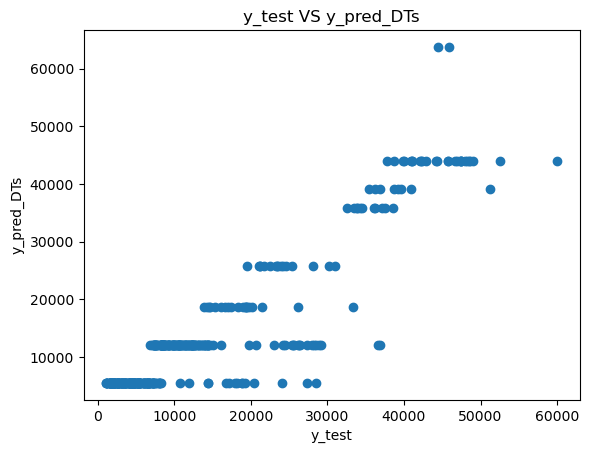

In [153]:
plt.scatter(y_test, y_pred_DTs)
plt.title("y_test VS y_pred_DTs")
plt.ylabel("y_pred_DTs")
plt.xlabel("y_test")

###### After hyperparamet tuning, the accuracy of the DT model increased to 83.8% on test data.

# 

## 13.2 | Now let's build another model with the original x.

In [154]:
df_without_outliers = df1.copy()
df_without_outliers.drop(index=index_list, inplace=True)

x_without_outliers = pd.DataFrame(df_without_outliers, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])
y_without_outliers = df_without_outliers["charges"]

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x_without_outliers, y_without_outliers, test_size=0.3, random_state=0)

In [156]:
DTs_reg_without_outliers = DecisionTreeRegressor(max_depth= 3, random_state= 7, splitter= 'best')
DTs_reg_without_outliers.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=7)

In [157]:
Evaluation(x_train, y_train, DTs_reg_without_outliers)

mean_absolute_error :  2718.860589184145
mean_squared_error  :  20807102.399765037
root_mean_absolute_error 4561.480286021747
R2_score            :  0.6256605931357229


In [158]:
Evaluation(x_test, y_test, DTs_reg_without_outliers)

mean_absolute_error :  2434.1676987004485
mean_squared_error  :  14994336.416160947
root_mean_absolute_error 3872.252111647813
R2_score            :  0.6696990908224196


In [159]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(DTs_reg_without_outliers, x_without_outliers, y_without_outliers, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.61373435 0.50565683 0.50822724 0.7085325  0.71637627 0.63641609
 0.67738251 0.65474946 0.55803624 0.51216514]
mean of all scores is :  0.6091276632744502


In [160]:
y_pred_DTs_reg_without_outliers = DTs_reg_without_outliers.predict(x_test)

In [161]:
DTs_reg_without_outliers_score = metrics.r2_score(y_test, y_pred_DTs_reg_without_outliers)
DTs_reg_without_outliers_score

0.6696990908224196

Text(0.5, 0, 'y_test')

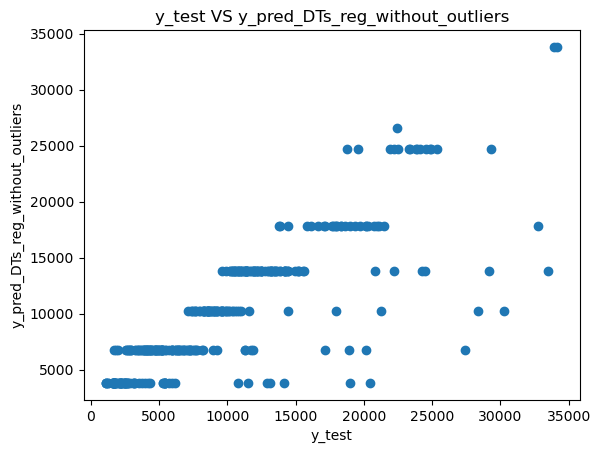

In [162]:
plt.scatter(y_test, y_pred_DTs_reg_without_outliers)
plt.title("y_test VS y_pred_DTs_reg_without_outliers")
plt.ylabel("y_pred_DTs_reg_without_outliers")
plt.xlabel("y_test")

###### After hyperparamet tuning and removing outliers, the accuracy of the DT model decreased to 66.9% on test data.

# 

# Step 14 | RandomForestRegressor

## train test split

In [163]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

## Building model and Evaaluation

In [164]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [165]:
Evaluation(x_train, y_train, random_forest)

mean_absolute_error :  990.3359231871649
mean_squared_error  :  3536617.601745261
root_mean_absolute_error 1880.5896952140467
R2_score            :  0.9745561008881974


In [166]:
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2707.961729899313
mean_squared_error  :  24026600.81555673
root_mean_absolute_error 4901.693668065838
R2_score            :  0.8532812262167565


## Improving model and Evaluation

In [168]:
n_estimators = (100,200)
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
max_depth = range(3,21)
random_state =range(1,8)

params = {"max_depth":max_depth, "random_state":random_state, "n_estimators":n_estimators}

RF_grid = GridSearchCV(random_forest, param_grid=params,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

RF_grid.fit(x_train, y_train)


print('best parameters:',RF_grid.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 4, 'n_estimators': 200, 'random_state': 1}


In [170]:
# using squared_error as criterion

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="squared_error", random_state=5)
random_forest.fit(x_train, y_train)
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2786.248095937172
mean_squared_error  :  22722335.035502885
root_mean_absolute_error 4766.795048615252
R2_score            :  0.8612457434368971


In [171]:
# using squared_error as friedman_mse

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="friedman_mse", random_state=5)
random_forest.fit(x_train, y_train)
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2786.8052153716935
mean_squared_error  :  22732815.101529445
root_mean_absolute_error 4767.894199909373
R2_score            :  0.8611817467671897


In [172]:
# using squared_error as absolute_error

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="absolute_error", random_state=5)
random_forest.fit(x_train, y_train)
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2250.217509763681
mean_squared_error  :  24300179.271070026
root_mean_absolute_error 4929.5212009961
R2_score            :  0.8516106155534107


In [173]:
# using squared_error as poisson

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="poisson", random_state=5)
random_forest.fit(x_train, y_train)
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2744.235964926254
mean_squared_error  :  22381392.342544377
root_mean_absolute_error 4730.897625455911
R2_score            :  0.8633277147579855


###### As you can see, the model with "squared_error" as criterion has the highest score on test data.

In [174]:
# using squared_error as criterion

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="squared_error", random_state=5)
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=5)

In [175]:
Evaluation(x_train, y_train, random_forest)

mean_absolute_error :  2335.148602378918
mean_squared_error  :  17130979.77114034
root_mean_absolute_error 4138.958778622993
R2_score            :  0.8767526009122029


In [176]:
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2786.248095937172
mean_squared_error  :  22722335.035502885
root_mean_absolute_error 4766.795048615252
R2_score            :  0.8612457434368971


In [177]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(random_forest, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.89228717 0.86441759 0.84023994 0.75895324 0.86258418 0.92225188
 0.87499639 0.81312353 0.86726522 0.86140051]
mean of all scores is :  0.8557519650031246


In [178]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(random_forest, x_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.89718753 0.84511768 0.74196126 0.84173841 0.8075678  0.86670031
 0.84631007 0.88954887 0.87027105 0.86994683]
mean of all scores is :  0.8476349820937712


In [179]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(random_forest, x_test, y_test, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.86546483 0.93908034 0.82224899 0.70166717 0.79348233 0.92674669
 0.84230631 0.73140596 0.9160756  0.8872748 ]
mean of all scores is :  0.8425753017913218


## Predict

In [180]:
y_pred_RF = random_forest.predict(x_test)

In [181]:
random_forest_score = metrics.r2_score(y_test, y_pred_RF)
random_forest_score

0.8612457434368971

## Compare

Text(0.5, 0, 'y_test')

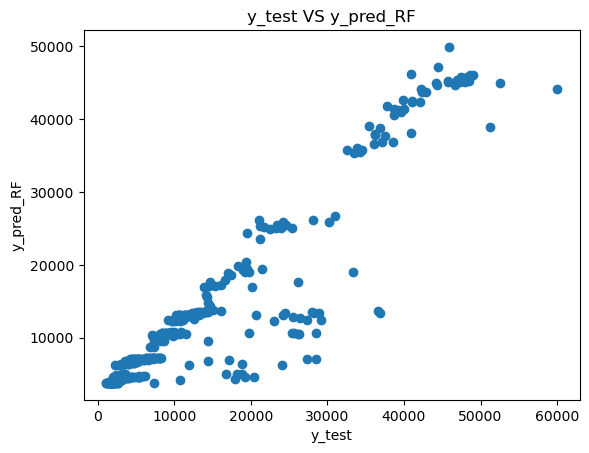

In [182]:
plt.scatter(y_test, y_pred_RF)
plt.title("y_test VS y_pred_RF")
plt.ylabel("y_pred_RF")
plt.xlabel("y_test")

# 

# Step 15 | k-nearest neighbors

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

## train test split

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Scaling

In [184]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Finding the bset number of k

In [185]:
def Best_knn(k_neighbors):

    training_accuracy = []
    testing_accuracy = []

    for k in range(1,k_neighbors) : 
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(x_train_scaled, y_train)
        training_accuracy.append(knn_model.score(x_train_scaled, y_train))
        testing_accuracy.append(knn_model.score(x_test_scaled, y_test)) 
        
    plt.plot(range(1,k_neighbors), training_accuracy, label="training accuracy")
    plt.plot(range(1,k_neighbors), testing_accuracy, label="testing accuracy") 
    plt.ylabel("Accuracy")
    plt.xlabel("numbers of neighbors")
    plt.grid()
    plt.legend()
    plt.show()

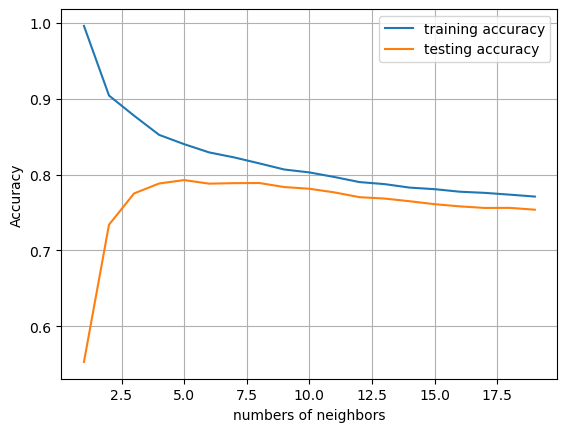

In [186]:
result_of_20_k = Best_knn(20)

## Let's choose 7 as the number of neighbors.

In [187]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

## Evaluation

In [188]:
Evaluation(x_train_scaled, y_train, knn)

mean_absolute_error :  3048.735313980138
mean_squared_error  :  24663879.27333177
root_mean_absolute_error 4966.274184268502
R2_score            :  0.822557786392668


In [189]:
Evaluation(x_test_scaled, y_test, knn)

mean_absolute_error :  3734.60328713575
mean_squared_error  :  34609166.83393949
root_mean_absolute_error 5882.955620599181
R2_score            :  0.7886586388763107


## Predict

In [190]:
y_pred_knn = knn.predict(x_test_scaled)

In [191]:
knn_score = metrics.r2_score(y_test, y_pred_knn)
knn_score

0.7886586388763107

## compare

Text(0.5, 0, 'y_test')

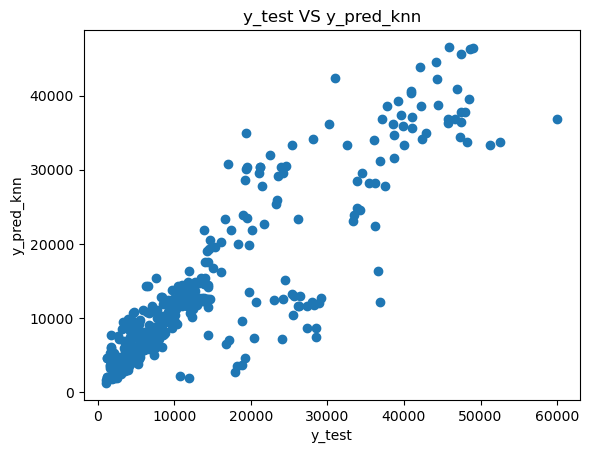

In [192]:
plt.scatter(y_test, y_pred_knn)
plt.title("y_test VS y_pred_knn")
plt.ylabel("y_pred_knn")
plt.xlabel("y_test")

# 

# Step 16 | Comparing

In [193]:
compare_df = pd.DataFrame()

dict = {'linear': linear_score,
                           'poly' : poly_score,
                          'ridge': ridge_score,
                          'lasso': lasso_score,
                          'elastic': elastic_score,
                          'DTs': DTs_score,
                          'DTs_no_outlier': DTs_reg_without_outliers_score,
                          'RF': random_forest_score,
                          'KNN': knn_score}

compare_df.append(dict,ignore_index=True)

,linear,poly,ridge,lasso,elastic,DTs,DTs_no_outlier,RF,KNN
0,0.762881,0.850369,0.850625,0.850397,0.844385,0.828005,0.669699,0.861246,0.788659
